1.Image Sampling
Write a program to change the spatial resolution from 256 x 256 to 128 x 128, 64 x 64, and 32 x 32 pixels using sub-sampling by a factor of 2, 4, and 8 correspondingly. For comparison purposes, resize the sub-sampled images back to the original size 256 x 256 (as shown in the lecture). Show your results using the “lenna” and “peppers” images from the image gallery. The example below shows how to sub-sample and resize an image assuming a factor of 2. Use the same idea for factors 4 and 8.

In [1]:
# Function to read the images
def load_image(Image):
    with open(Image, 'rb') as I: # It opens the file specified by Image in binary read mode ('rb') 
        header = I.readline().decode('utf-8').strip() # This line reads the first line of the file, decodes it from bytes to a Unicode string using UTF-8 encoding, and removes any whitespace characters
        if header != 'P2' and header != 'P5': # It checks if the header is not equal to either 'P2' or 'P5'. If it's not, it raises a Error message
            raise ValueError("Only PGM format is supported.")
        
        # To skip any comment lines (lines starting with '#')
        while True:
            line = I.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break
        # It splits the current line into a list of strings. It then maps these strings to integers and assigns them to width and height.
        size = line.split()
        width, height = map(int, size)
        max_val = int(I.readline().decode('utf-8')) # This line reads the maximum pixel value (usually 255) from the next line in the file and converts it to an integer.
        image_data = I.read()
        
        # Convert the image data to a 2D list (nested list)
        image = [[0] * width for _ in range(height)]
        index = 0
        for i in range(height):
            for j in range(width):
                image[i][j] = int(image_data[index])
                index += 1
    return image
# Function to save the image
def save_image(imagename, image, format_type):
    height = len(image)
    width = len(image[0])
    
    with open(imagename, 'wb') as I:
        # To check the format
        if format_type == 'P2':
            I.write(b'P2\n')
        elif format_type == 'P5':
            I.write(b'P5\n')
        else:
            raise ValueError("Unsupported PGM format type")
        I.write(f'{width} {height}\n'.encode('utf-8'))
        I.write(b'255\n') # Max Pixel Value
        # It writes the pixel values one by one to the file
        for i in range(height):
            for j in range(width):
                I.write(bytes([image[i][j]]))


# Function to subsample the images
def subsample(image, factor):
    height = len(image)
    width = len(image[0])
    # To find the new height and width
    new_height = height // factor
    new_width = width // factor
    
    subsampled_image = [[0] * new_width for _ in range(new_height)]

    for i in range(new_height):
        for j in range(new_width):
            subsampled_image[i][j] = image[i * factor][j * factor]
    return subsampled_image

# Function to resize the images
def resize(image, size):
    new_height, new_width = size
    resized_image = [[0] * new_width for _ in range(new_height)]
    
    height = len(image)
    width = len(image[0])

    for i in range(new_height):
        for j in range(new_width):
            src_i = i * height // new_height
            src_j = j * width // new_width
            resized_image[i][j] = image[src_i][src_j]
    return resized_image

# Load the original images
original_image1 = load_image('lenna.pgm')
original_image2 = load_image('peppers.pgm')

# Factors for sub-sampling and resizing
subsample_factors = [2, 4, 8]
resized_size = (256, 256)

# To Process and save the images
subsampled_images1 = []
resized_images1 = []
subsampled_images2 = []
resized_images2 = []

# The loop is responsible for loading images, performing subsampling, and resizing them.
for factor in subsample_factors:
    subsampled_image1 = subsample(original_image1, factor)
    resized_image1 = resize(subsampled_image1, resized_size)
    subsampled_images1.append(subsampled_image1)
    resized_images1.append(resized_image1)

    subsampled_image2 = subsample(original_image2, factor)
    resized_image2 = resize(subsampled_image2, resized_size)
    subsampled_images2.append(subsampled_image2)
    resized_images2.append(resized_image2)

# It calls the save_image function to save the subsampled and resized images
for i, (subsampled_image, resized_image) in enumerate(zip(subsampled_images1, resized_images1)):
    save_image(f'image1_subsampled_{subsample_factors[i]}.pgm', subsampled_image, format_type='P5')  # Save subsampled
    save_image(f'image1_resized_{subsample_factors[i]}.pgm', resized_image, format_type='P5')  # Save resized

for i, (subsampled_image, resized_image) in enumerate(zip(subsampled_images2, resized_images2)):
    save_image(f'image2_subsampled_{subsample_factors[i]}.pgm', subsampled_image, format_type='P5')  # Save subsampled
    save_image(f'image2_resized_{subsample_factors[i]}.pgm', resized_image, format_type='P5')  # Save resized


2.Image Quantization
Write a program to reduce the number of gray levels L in a PGM image from L=256 to: (i) L=128, (ii) L=32, (iii) L=8, and (iv) L=2. Show your results using the “lenna” and “peppers” images. For comparison purposes, subsample the gray-levels to better visualize the quantized images (e.g., if L=128, you can use 0, 2, 4, ..., 254 with Q=255 in the PGM file instead of 0, 1, 2, ..., 127 with Q=127; similarly, if L=2, you can use 0, 127 with Q=255 instead of 0, 1 with Q=1).

In [2]:
# For Lenna Image
# Function to load Images
def load_pgm_image(filename):
    with open(filename, "rb") as f:
        # Read the PGM header
        header = f.readline().decode().strip()
        if header != "P5":
            raise ValueError("Invalid PGM file format")

        # Skip comment lines
        while True:
            line = f.readline().decode().strip()
            if not line.startswith("#"):
                break

        # Read the dimensions and max value
        width, height = map(int, line.split())
        max_val = int(f.readline())

        # Read the pixel data
        image_data = []
        for _ in range(height):
            row = []
            for _ in range(width):
                pixel_value = int.from_bytes(f.read(1), byteorder="big")
                row.append(pixel_value)
            image_data.append(row)
    return image_data
# Function to save Images
def save_pgm_image(filename, image_data):
    height = len(image_data)
    width = len(image_data[0])
    max_val = 255  # Maximum value for a PGM image
    with open(filename, "wb") as f:
        f.write(b"P5\n")
        f.write(b"# Created by Python\n")
        f.write(f"{width} {height}\n".encode())  # Encode and write as bytes
        f.write(f"{max_val}\n".encode())  # Include the new max value
        for row in image_data:
            for pixel_value in row:
                f.write(bytes([int(pixel_value)]))

def quantize_to_2_gray_levels(input_image):
    # Create a new image with 2 gray levels (e.g., 0 and 255)
    quantized_image = [[0 if pixel_value < 128 else 255 for pixel_value in row] for row in input_image]

    return quantized_image

def quantize_gray_levels(input_image, levels):
    # Calculate the step size for quantization
    step_size = 256 / levels

    # Create a new image with the specified gray levels
    quantized_image = [
        [int(pixel_value // step_size * step_size) for pixel_value in row]
        for row in input_image
    ]

    return quantized_image

# Load the Lena image
lena_image = load_pgm_image("lenna.pgm")

gray_levels = [128, 32, 8, 2]

for levels in gray_levels:
    if levels == 2:
        # Special case for 2 gray levels
        quantized_image = quantize_to_2_gray_levels(lena_image)
    else:
        # Quantize the Lena image to the specified gray levels
        quantized_image = quantize_gray_levels(lena_image, levels)

    # Save the quantized image
    output_image_name = f"lenna_{levels}.pgm"
    save_pgm_image(output_image_name, quantized_image)

    print(f"Saved: {output_image_name}")

# Load the Pepper image
pepper_image = load_pgm_image("peppers.pgm")

for levels in gray_levels:
    if levels == 2:
        # Special case for 2 gray levels
        quantized_image = quantize_to_2_gray_levels(pepper_image)
    else:
        # Quantize the Pepper image to the specified gray levels
        quantized_image = quantize_gray_levels(pepper_image, levels)

    # Save the quantized image
    output_image_name = f"peppers_{levels}.pgm"
    save_pgm_image(output_image_name, quantized_image)

    print(f"Saved: {output_image_name}")


Saved: lenna_128.pgm
Saved: lenna_32.pgm
Saved: lenna_8.pgm
Saved: lenna_2.pgm
Saved: peppers_128.pgm
Saved: peppers_32.pgm
Saved: peppers_8.pgm
Saved: peppers_2.pgm


3.Histogram Equalization
(a) Implement the histogram equalization technique. Debug your algorithm using a “test” image (e.g., 5 x 5) to make sure that it works correctly.

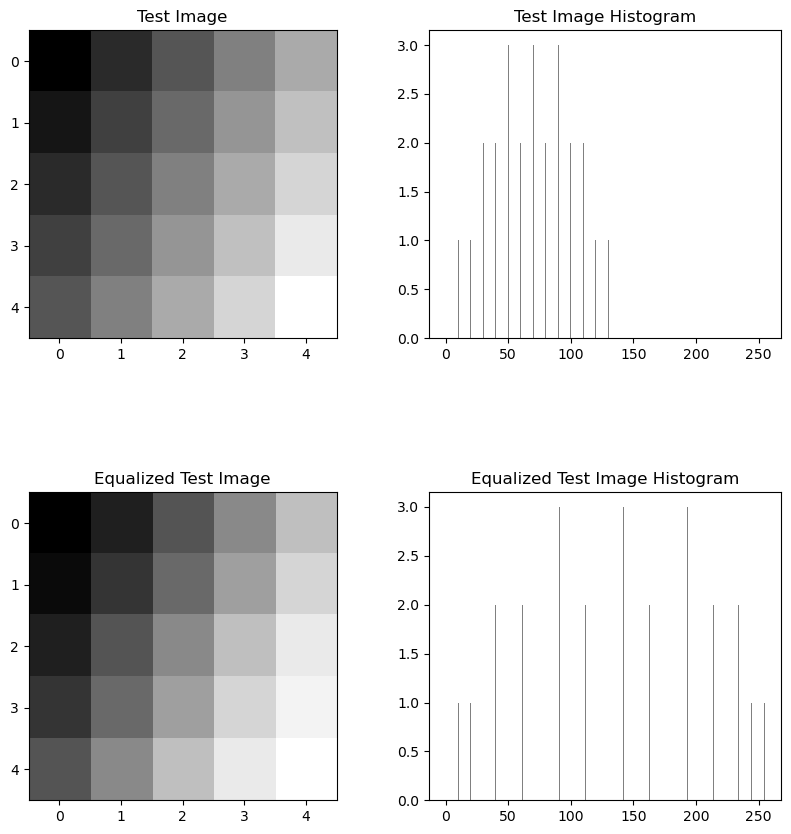

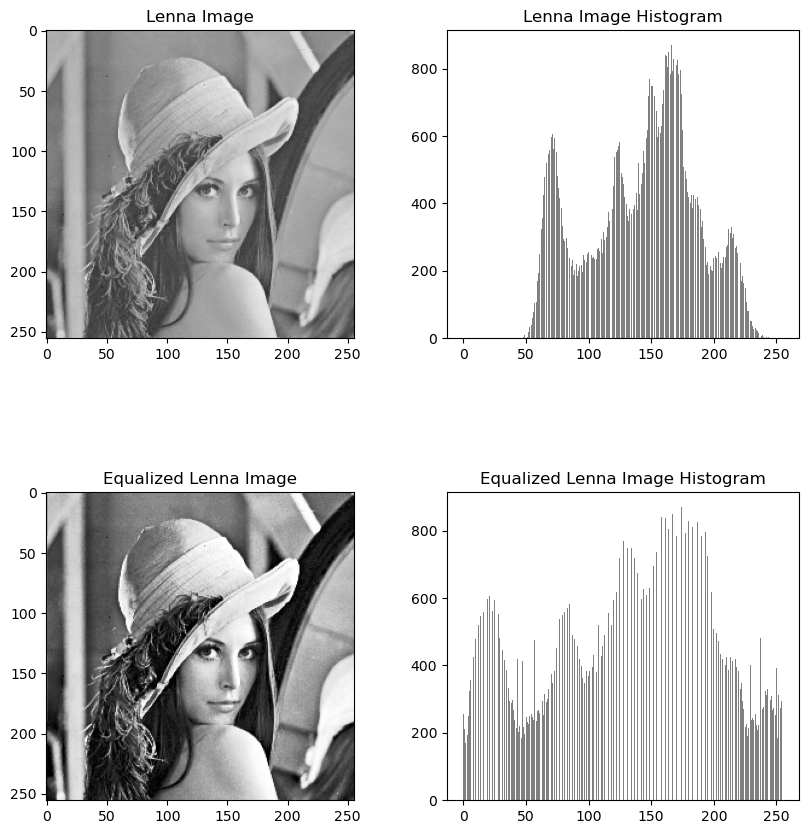

In [3]:
# Import the required the Libraries
import matplotlib.pyplot as plt

# Function to perform histogram equalization
def histogram_equalization(image):
    # Compute histogram
    histogram = [0] * 256
    for row in image:
        for pixel_value in row:
            histogram[pixel_value] += 1

    # Compute cumulative distribution function (CDF)
    cdf = [0] * 256
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]

    # Normalize CDF to the range [0, 255]
    min_cdf = min(cdf)
    max_cdf = max(cdf)
    cdf_normalized = [int(((cdf[i] - min_cdf) / (max_cdf - min_cdf)) * 255) for i in range(256)]

    # Apply equalization to the image
    equalized_image = [[cdf_normalized[pixel_value] for pixel_value in row] for row in image]

    return equalized_image
test_image = [
    [10, 30, 50, 70, 90],
    [20, 40, 60, 80, 100],
    [30, 50, 70, 90, 110],
    [40, 60, 80, 100, 120],
    [50, 70, 90, 110, 130]
]

# Perform histogram equalization on the test image
equalized_test_image = histogram_equalization(test_image)

# Load the "lenna" image
with open('lenna.pgm', 'rb') as f:# It opens the file specified by Image in binary read mode ('rb')
    header = f.readline().decode('utf-8').strip()# This line reads the first line of the file, decodes it from bytes to a Unicode string using UTF-8 encoding, and removes any whitespace characters
    if header != 'P2' and header != 'P5':# It checks if the header is not equal to either 'P2' or 'P5'. If it's not, it raises a Error message
        raise ValueError("Only PGM format is supported.")

    # Skip any comment lines (lines starting with '#')
    while True:
        line = f.readline().decode('utf-8').strip()
        if not line.startswith('#'):
            break
    # It splits the current line into a list of strings. It then maps these strings to integers and assigns them to width and height.
    size = line.split()
    width, height = map(int, size)
    max_val = int(f.readline().decode('utf-8'))
    image_data = f.read()
    
    lenna_pixels = []
    row_data = []
    for pixel_value in image_data:
        row_data.append(int(pixel_value))
        if len(row_data) == width:
            lenna_pixels.append(row_data)
            row_data = []

# Perform histogram equalization on Lenna image
equalized_lenna = histogram_equalization(lenna_pixels)

# Define a function to plot histograms
def plot_histogram(image, title, ax):
    histogram = [0] * 256
    for row in image:
        for pixel_value in row:
            histogram[pixel_value] += 1
    ax.bar(range(256), histogram, color='gray')
    ax.set_title(title)
    
# To create subplots for the test image and its histogram        
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
axes[0, 0].imshow(test_image, cmap='gray')
axes[0, 0].set_title('Test Image')
plot_histogram(test_image, 'Test Image Histogram', axes[0, 1])
axes[1, 0].imshow(equalized_test_image, cmap='gray')
axes[1, 0].set_title('Equalized Test Image')
plot_histogram(equalized_test_image, 'Equalized Test Image Histogram', axes[1, 1])

# To Create subplots for Lenna image and its histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
axes[0, 0].imshow(lenna_pixels, cmap='gray')
axes[0, 0].set_title('Lenna Image')
plot_histogram(lenna_pixels, 'Lenna Image Histogram', axes[0, 1])
axes[1, 0].imshow(equalized_lenna, cmap='gray')
axes[1, 0].set_title('Equalized Lenna Image')
plot_histogram(equalized_lenna, 'Equalized Lenna Image Histogram', axes[1, 1])
plt.show()

3 (b) Perform histogram equalization on the “boat” and “f_16” images

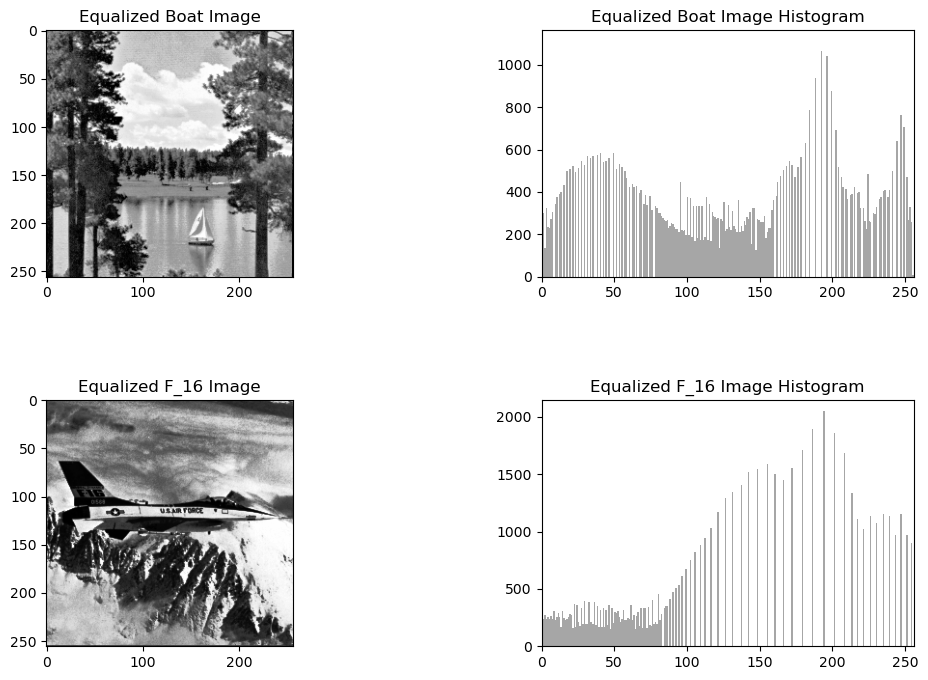

In [4]:
# Import the required the Libraries
import matplotlib.pyplot as plt

# Define a function to load a PGM image
def load_image(filename):
    with open(filename, 'rb') as f:
        header = f.readline().decode('utf-8').strip()
        if header != 'P2' and header != 'P5':
            raise ValueError("Only PGM format is supported.")
        
        while True:
            line = f.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break
        
        size = line.split()
        width, height = map(int, size)
        max_val = int(f.readline().decode('utf-8'))
        image_data = f.read()
        
        # Convert the image data to a 2D list (nested list)
        image = [[0] * width for _ in range(height)]
        index = 0
        for i in range(height):
            for j in range(width):
                image[i][j] = int(image_data[index])
                index += 1
        return image

# Define a function for histogram equalization
def histogram_equalization(image):
    # Flatten the image
    flat_image = [pixel for row in image for pixel in row]
    
    # Calculate the histogram
    histogram = [0] * 256
    for pixel_value in flat_image:
        histogram[pixel_value] += 1

    # Calculate the cumulative distribution function (CDF)
    cdf = [sum(histogram[:i+1]) for i in range(256)]

    # Calculate the equalized values
    equalized_image = []
    total_pixels = len(flat_image)
    for pixel_value in flat_image:
        equalized_value = int(255 * cdf[pixel_value] / total_pixels)
        equalized_image.append(equalized_value)
    
    # Reshape the equalized image to its original shape
    equalized_image = [equalized_image[i:i+len(image[0])] for i in range(0, len(equalized_image), len(image[0]))]

    return equalized_image

# Define a function to plot histograms
def plot_histogram(image, title, ax):
    # Flatten the image
    flat_image = [pixel for row in image for pixel in row]

    # Calculate the histogram
    histogram = [0] * 256
    for pixel_value in flat_image:
        histogram[pixel_value] += 1
    
    ax.hist(flat_image, bins=range(257), color='gray', alpha=0.7)
    ax.set_title(title)
    ax.set_xlim([0, 256])
    ax.set_ylim([0, max(histogram) + 100])

# Load the "boat" image using your load_image function
boat_image = load_image('boat.pgm')

# Load the "f_16" image using your load_image function
f_16_image = load_image('f_16.pgm')

# Perform histogram equalization on the Boat and F_16 images
equalized_boat = histogram_equalization(boat_image)
equalized_f_16 = histogram_equalization(f_16_image)

# To Create subplots for Equalized Boat and Equalized F_16 images and their histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Equalized Boat Image and Histogram
axes[0, 0].imshow(equalized_boat, cmap='gray')
axes[0, 0].set_title('Equalized Boat Image')
plot_histogram(equalized_boat, 'Equalized Boat Image Histogram', axes[0, 1])

# Equalized F_16 Image and Histogram
axes[1, 0].imshow(equalized_f_16, cmap='gray')
axes[1, 0].set_title('Equalized F_16 Image')
plot_histogram(equalized_f_16, 'Equalized F_16 Image Histogram', axes[1, 1])

plt.show()


3 (c) Show all histograms before and after equalization and discuss your results.

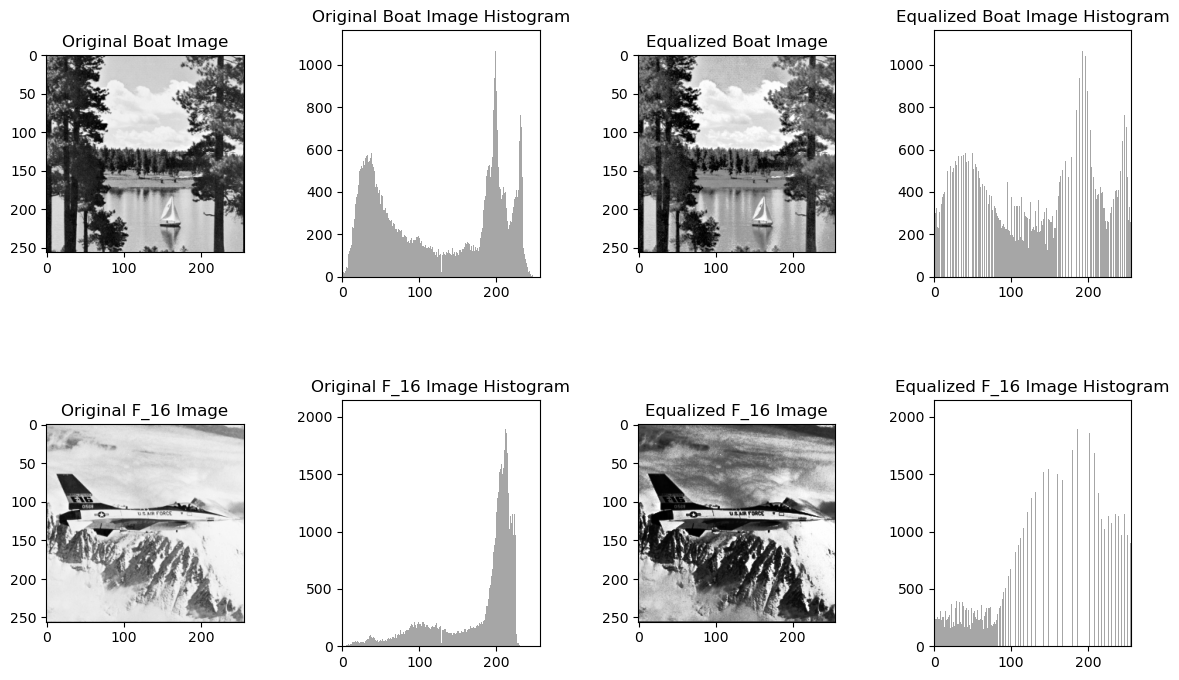

In [5]:
# Import the required the Libraries
import matplotlib.pyplot as plt

# Function to load a PGM image
def load_image(filename):
    with open(filename, 'rb') as f:
        header = f.readline().decode('utf-8').strip()
        if header != 'P2' and header != 'P5':
            raise ValueError("Only PGM format is supported.")
        
        # Skip comment lines
        while True:
            line = f.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break
        
        size = line.split()
        width, height = map(int, size)
        max_val = int(f.readline().decode('utf-8'))
        image_data = f.read()
        
        # Convert the image data to a 2D list (nested list)
        image = [[0] * width for _ in range(height)]
        index = 0
        for i in range(height):
            for j in range(width):
                image[i][j] = int(image_data[index])
                index += 1
        return image

# Define a function for histogram equalization
def histogram_equalization(image):
    # Flatten the image
    flat_image = [pixel for row in image for pixel in row]
    
    # Calculate the histogram
    histogram = [0] * 256
    for pixel_value in flat_image:
        histogram[pixel_value] += 1

    # Calculate the cumulative distribution function (CDF)
    cdf = [sum(histogram[:i+1]) for i in range(256)]

    # Calculate the equalized values
    equalized_image = []
    total_pixels = len(flat_image)
    for pixel_value in flat_image:
        equalized_value = int(255 * cdf[pixel_value] / total_pixels)
        equalized_image.append(equalized_value)
    
    # Reshape the equalized image to its original shape
    equalized_image = [equalized_image[i:i+len(image[0])] for i in range(0, len(equalized_image), len(image[0]))]

    return equalized_image

# Define a function to plot histograms
def plot_histogram(image, title, ax):
    # Flatten the image
    flat_image = [pixel for row in image for pixel in row]

    # Calculate the histogram
    histogram = [0] * 256
    for pixel_value in flat_image:
        histogram[pixel_value] += 1
    
    ax.hist(flat_image, bins=range(257), color='gray', alpha=0.7)
    ax.set_title(title)
    ax.set_xlim([0, 256])
    ax.set_ylim([0, max(histogram) + 100])

# Load the "boat" image using your load_image function
boat_image = load_image('boat.pgm')

# Load the "f_16" image using your load_image function
f_16_image = load_image('f_16.pgm')

# Perform histogram equalization on the Boat and F_16 images
equalized_boat = histogram_equalization(boat_image)
equalized_f_16 = histogram_equalization(f_16_image)

# Create subplots for Boat and F_16 images and their histograms
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Original Boat Image and Histogram
axes[0, 0].imshow(boat_image, cmap='gray')
axes[0, 0].set_title('Original Boat Image')
plot_histogram(boat_image, 'Original Boat Image Histogram', axes[0, 1])

# Equalized Boat Image and Histogram
axes[0, 2].imshow(equalized_boat, cmap='gray')
axes[0, 2].set_title('Equalized Boat Image')
plot_histogram(equalized_boat, 'Equalized Boat Image Histogram', axes[0, 3])

# Original F_16 Image and Histogram
axes[1, 0].imshow(f_16_image, cmap='gray')
axes[1, 0].set_title('Original F_16 Image')
plot_histogram(f_16_image, 'Original F_16 Image Histogram', axes[1, 1])

# Equalized F_16 Image and Histogram
axes[1, 2].imshow(equalized_f_16, cmap='gray')
axes[1, 2].set_title('Equalized F_16 Image')
plot_histogram(equalized_f_16, 'Equalized F_16 Image Histogram', axes[1, 3])

plt.show()

4.Histogram Specification
(a) Implement the histogram specification technique. Debug your algorithm using a “test” image (e.g., 5 x 5) to make sure that it works correctly.

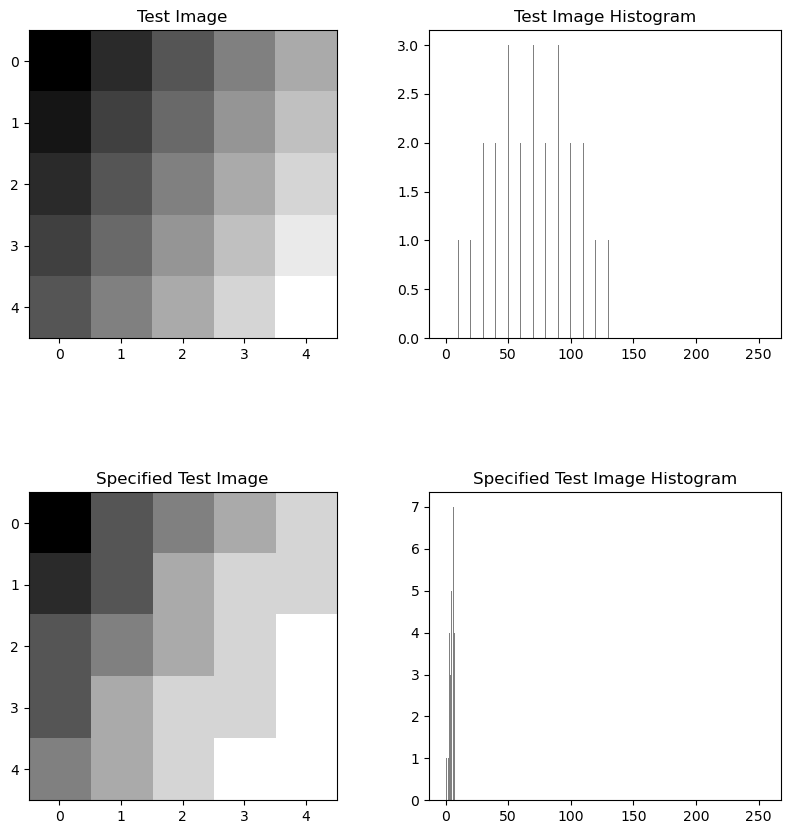

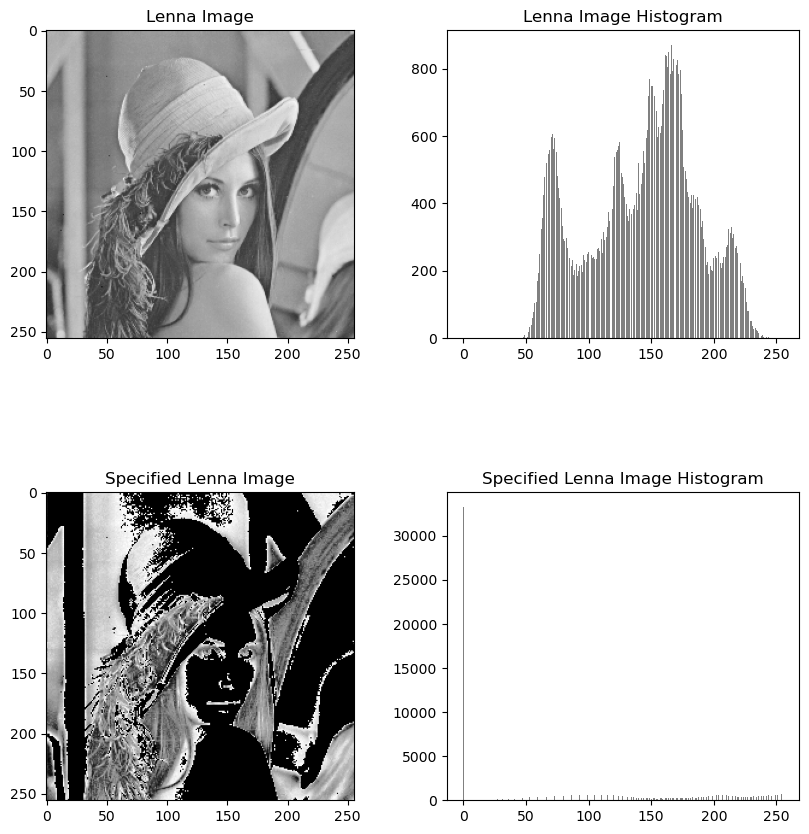

In [6]:
# Import the required the Libraries
import matplotlib.pyplot as plt

# Define a function to perform histogram specification
def histogram_specification(image, target_histogram):
    # Calculate the histogram of the input image
    input_histogram = [0] * 256
    for row in image:
        for pixel_value in row:
            input_histogram[pixel_value] += 1

    # Calculate the cumulative histogram of the input image
    cumulative_input_histogram = [sum(input_histogram[:i+1]) for i in range(256)]

    # Calculate the cumulative histogram of the target histogram
    cumulative_target_histogram = [sum(target_histogram[:i+1]) for i in range(256)]

    # Create a mapping function to match the histograms
    mapping_function = [0] * 256
    for i in range(256):
        for j in range(256):
            if cumulative_target_histogram[j] >= cumulative_input_histogram[i]:
                mapping_function[i] = j
                break

    # Apply the mapping function to the input image
    output_image = [[mapping_function[pixel_value] for pixel_value in row] for row in image]

    return output_image

test_image = [
    [10, 30, 50, 70, 90],
    [20, 40, 60, 80, 100],
    [30, 50, 70, 90, 110],
    [40, 60, 80, 100, 120],
    [50, 70, 90, 110, 130]
]

# Define a target histogram with the same number of bins as the input image
target_histogram = [0] * 256
for i in range(256):
    # You can specify the desired values for each bin here.
    # For example, for a simple contrast adjustment, you can distribute the values evenly:
    target_histogram[i] = int(i * (255 / 255))  # Adjust the scaling factor as needed

# Perform histogram specification on the test image
specified_test_image = histogram_specification(test_image, target_histogram)

# Load the "lenna" image
with open('lenna.pgm', 'rb') as f:
    header = f.readline().decode('utf-8').strip()
    if header != 'P2' and header != 'P5':
        raise ValueError("Only PGM format is supported.")

    while True:
        line = f.readline().decode('utf-8').strip()
        if not line.startswith('#'):
            break

    size = line.split()
    width, height = map(int, size)
    max_val = int(f.readline().decode('utf-8'))
    image_data = f.read()
    
    lenna_pixels = []
    row_data = []
    for pixel_value in image_data:
        row_data.append(int(pixel_value))
        if len(row_data) == width:
            lenna_pixels.append(row_data)
            row_data = []

# Perform histogram specification on Lenna image
specified_lenna = histogram_specification(lenna_pixels, target_histogram)

# Function to plot histograms
def plot_histogram(image, title, ax):
    histogram = [0] * 256
    for row in image:
        for pixel_value in row:
            histogram[pixel_value] += 1
    ax.bar(range(256), histogram, color='gray')
    ax.set_title(title)

# Create subplots for the test image and its histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
axes[0, 0].imshow(test_image, cmap='gray')
axes[0, 0].set_title('Test Image')
plot_histogram(test_image, 'Test Image Histogram', axes[0, 1])
axes[1, 0].imshow(specified_test_image, cmap='gray')
axes[1, 0].set_title('Specified Test Image')
plot_histogram(specified_test_image, 'Specified Test Image Histogram', axes[1, 1])

# Create subplots for Lenna image and its histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
axes[0, 0].imshow(lenna_pixels, cmap='gray')
axes[0, 0].set_title('Lenna Image')
plot_histogram(lenna_pixels, 'Lenna Image Histogram', axes[0, 1])
axes[1, 0].imshow(specified_lenna, cmap='gray')
axes[1, 0].set_title('Specified Lenna Image')
plot_histogram(specified_lenna, 'Specified Lenna Image Histogram', axes[1, 1])
plt.show()


(b) Perform histogram specification on “boat” and “f_16” images. Assume that the specified histogram for the “boat” image is the histogram of the “sf” image and that the specified histogram for the “f_16” image is the histogram of the “peppers” image.

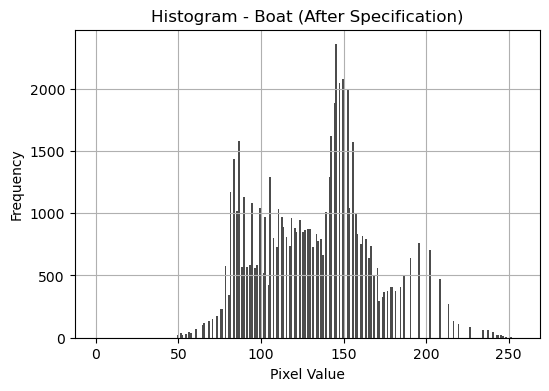

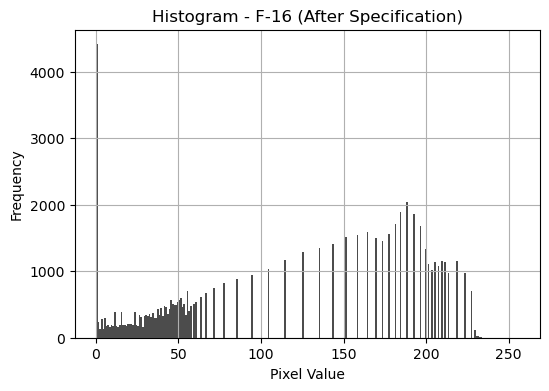

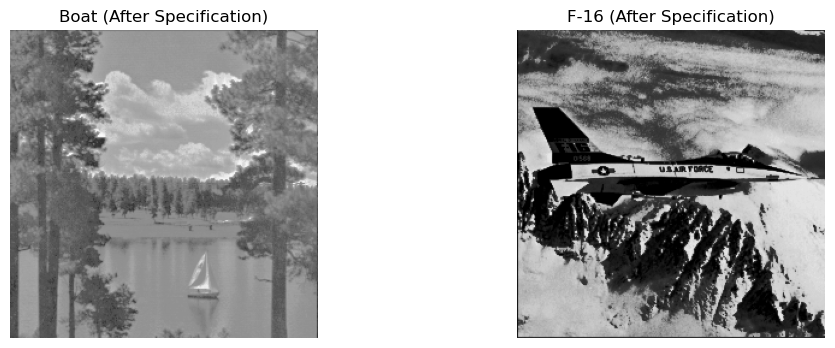

In [7]:
# Import the required the Libraries
import matplotlib.pyplot as plt
import numpy as np

# Define a function to perform histogram specification
def histogram_specification(image, target_histogram):
    # Calculate the histogram of the input image
    input_histogram = [0] * 256
    for row in image:
        for pixel_value in row:
            input_histogram[pixel_value] += 1

    # Calculate the cumulative histogram of the input image
    cumulative_input_histogram = [sum(input_histogram[:i+1]) for i in range(256)]

    # Calculate the cumulative histogram of the target histogram
    cumulative_target_histogram = [sum(target_histogram[:i+1]) for i in range(256)]

    # Create a mapping function to match the histograms
    mapping_function = [0] * 256
    for i in range(256):
        for j in range(256):
            if cumulative_target_histogram[j] >= cumulative_input_histogram[i]:
                mapping_function[i] = j
                break

    # Apply the mapping function to the input image
    output_image = [[mapping_function[pixel_value] for pixel_value in row] for row in image]

    return output_image



# Define a function to load a PGM image
def load_pgm_image(filename):
    with open(filename, "rb") as f:
        # Read the PGM header
        header = f.readline().decode().strip()
        if header != "P5":
            raise ValueError("Invalid PGM file format")

        # Skip comment lines
        while True:
            line = f.readline().decode().strip()
            if not line.startswith("#"):
                break

        # Read the dimensions and max value
        width, height = map(int, line.split())
        max_val = int(f.readline())

        # Read the pixel data
        image_data = []
        for _ in range(height):
            row = []
            for _ in range(width):
                pixel_value = int.from_bytes(f.read(1), byteorder="big")
                row.append(pixel_value)
            image_data.append(row)

    return image_data

# Define a function to compute and plot a histogram
def plot_histogram(image, title):
    plt.figure(figsize=(6, 4))
    plt.title(f'Histogram - {title}')
    plt.hist(np.array(image).ravel(), bins=256, range=(0, 256), color='black', alpha=0.7)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Define a function to display two images side by side
def display_two_images(image1, title1, image2, title2):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(image1, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(image2, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    
    plt.show()

# Load the "boat" image
boat_image = load_pgm_image("boat.pgm")

# Load the "f_16" image
f_16_image = load_pgm_image("f_16.pgm")

# Load the histograms of the "sf" and "peppers" images
sf_histogram = [0] * 256
peppers_histogram = [0] * 256

# Load the histograms from the specified images ("sf.pgm" and "peppers.pgm")
sf_image = load_pgm_image("sf.pgm")
peppers_image = load_pgm_image("peppers.pgm")

for row in sf_image:
    for pixel_value in row:
        sf_histogram[pixel_value] += 1

for row in peppers_image:
    for pixel_value in row:
        peppers_histogram[pixel_value] += 1

# Compute and plot histograms and images after specification for "boat"
output_boat = histogram_specification(boat_image, sf_histogram)
plot_histogram(output_boat, 'Boat (After Specification)')

# Compute and plot histograms and images after specification for "f_16"
output_f16 = histogram_specification(f_16_image, peppers_histogram)
plot_histogram(output_f16, 'F-16 (After Specification)')

# Display two images (Boat and F-16) in a row
display_two_images(output_boat, 'Boat (After Specification)', output_f16, 'F-16 (After Specification)')


(c) Show all histograms before and after specification and discuss your results.

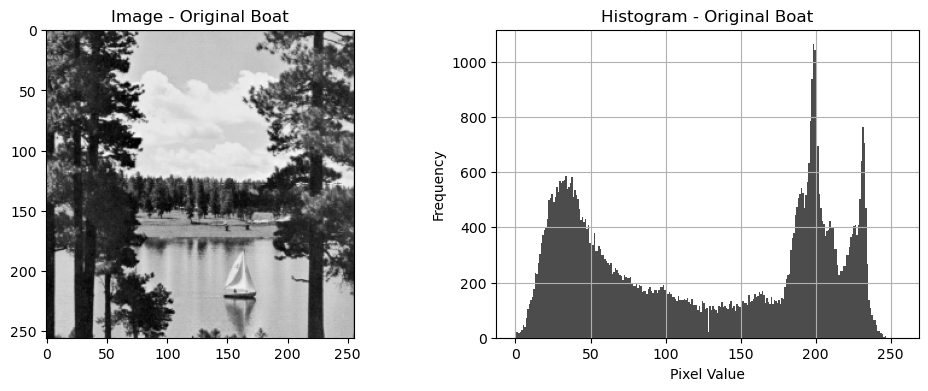

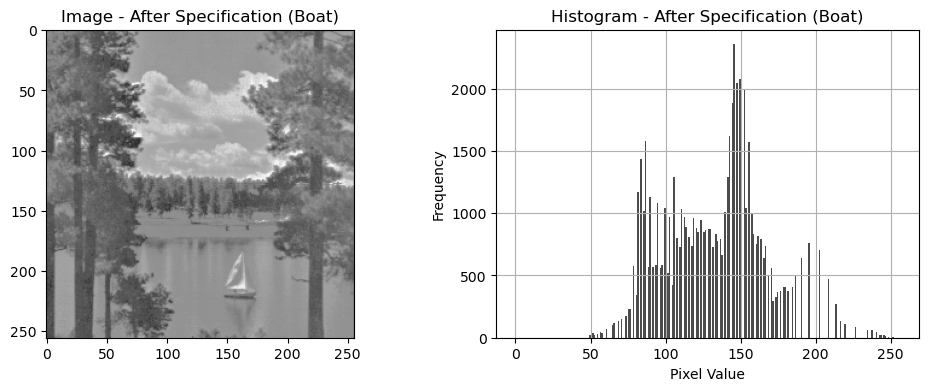

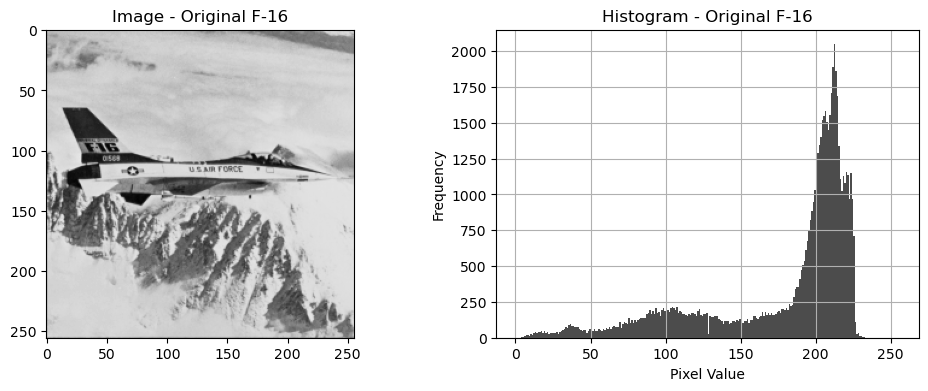

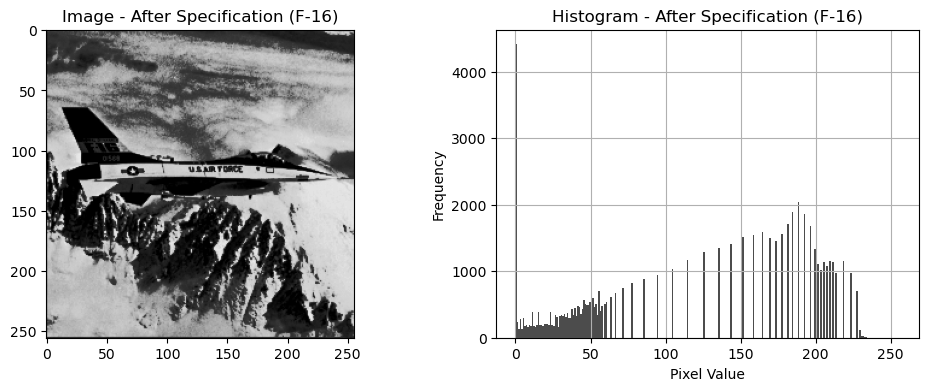

In [9]:
# Import the required the Libraries
import matplotlib.pyplot as plt
import numpy as np

# Define a function to perform histogram specification
def histogram_specification(image, target_histogram):
    # Calculate the histogram of the input image
    input_histogram = [0] * 256
    for row in image:
        for pixel_value in row:
            input_histogram[pixel_value] += 1

    # Calculate the cumulative histogram of the input image
    cumulative_input_histogram = [sum(input_histogram[:i+1]) for i in range(256)]

    # Calculate the cumulative histogram of the target histogram
    cumulative_target_histogram = [sum(target_histogram[:i+1]) for i in range(256)]

    # Create a mapping function to match the histograms
    mapping_function = [0] * 256
    for i in range(256):
        for j in range(256):
            if cumulative_target_histogram[j] >= cumulative_input_histogram[i]:
                mapping_function[i] = j
                break

    # Apply the mapping function to the input image
    output_image = [[mapping_function[pixel_value] for pixel_value in row] for row in image]

    return output_image


# Define a function to load a PGM image
def load_pgm_image(filename):
    with open(filename, "rb") as f:
        # Read the PGM header
        header = f.readline().decode().strip()
        if header != "P5":
            raise ValueError("Invalid PGM file format")

        # Skip comment lines
        while True:
            line = f.readline().decode().strip()
            if not line.startswith("#"):
                break

        # Read the dimensions and max value
        width, height = map(int, line.split())
        max_val = int(f.readline())

        # Read the pixel data
        image_data = []
        for _ in range(height):
            row = []
            for _ in range(width):
                pixel_value = int.from_bytes(f.read(1), byteorder="big")
                row.append(pixel_value)
            image_data.append(row)

    return image_data

# Define a function to compute and plot a histogram
def plot_histogram(image, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Image - {title}')
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.subplot(1, 2, 2)
    plt.title(f'Histogram - {title}')
    plt.hist(np.array(image).ravel(), bins=256, range=(0, 256), color='black', alpha=0.7)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Load the "boat" image
boat_image = load_pgm_image("boat.pgm")

# Load the "f_16" image
f_16_image = load_pgm_image("f_16.pgm")

# Load the histograms of the "sf" and "peppers" images
sf_histogram = [0] * 256
peppers_histogram = [0] * 256

# Load the histograms from the specified images ("sf.pgm" and "peppers.pgm")
sf_image = load_pgm_image("sf.pgm")
peppers_image = load_pgm_image("peppers.pgm")

for row in sf_image:
    for pixel_value in row:
        sf_histogram[pixel_value] += 1

for row in peppers_image:
    for pixel_value in row:
        peppers_histogram[pixel_value] += 1

# Compute and plot histograms before and after specification for "boat"
plot_histogram(boat_image, 'Original Boat')
output_boat = histogram_specification(boat_image, sf_histogram)
plot_histogram(output_boat, 'After Specification (Boat)')

# Compute and plot histograms before and after specification for "f_16"
plot_histogram(f_16_image, 'Original F-16')
output_f16 = histogram_specification(f_16_image, peppers_histogram)
plot_histogram(output_f16, 'After Specification (F-16)')
